Import Libraries and Load Data

In [1]:
# Import Required Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/raw/mental-heath-in-tech-2016_20161114.csv"
df = pd.read_csv(data_path)

print("Data loaded successfully:", df.shape) 

Data loaded successfully: (1433, 63)


Clean Column Names

In [2]:
# === Clean Column Names (remove spaces, lowercase, replace special chars) ===
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^a-z0-9_]', '', regex=True)
)

print("Column names cleaned")
df.columns[:10]

Column names cleaned


Index(['are_you_selfemployed',
       'how_many_employees_does_your_company_or_organization_have',
       'is_your_employer_primarily_a_tech_companyorganization',
       'is_your_primary_role_within_your_company_related_to_techit',
       'does_your_employer_provide_mental_health_benefits_as_part_of_healthcare_coverage',
       'do_you_know_the_options_for_mental_health_care_available_under_your_employerprovided_coverage',
       'has_your_employer_ever_formally_discussed_mental_health_for_example_as_part_of_a_wellness_campaign_or_other_official_communication',
       'does_your_employer_offer_resources_to_learn_more_about_mental_health_concerns_and_options_for_seeking_help',
       'is_your_anonymity_protected_if_you_choose_to_take_advantage_of_mental_health_or_substance_abuse_treatment_resources_provided_by_your_employer',
       'if_a_mental_health_issue_prompted_you_to_request_a_medical_leave_from_work_asking_for_that_leave_would_be'],
      dtype='object')

Fix Age Outliers and Plot

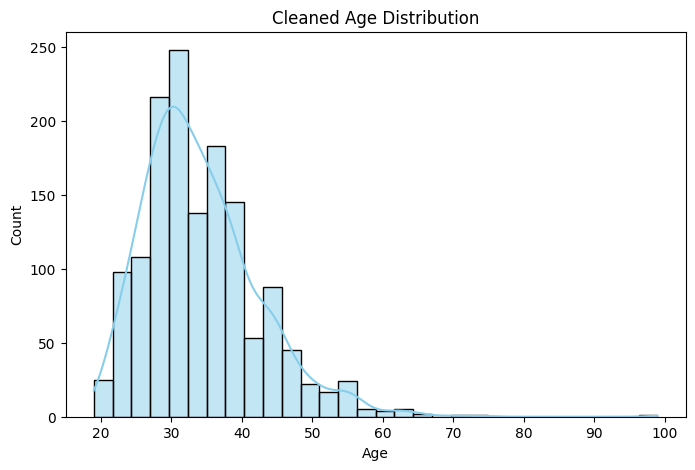

Age outliers handled successfully


In [3]:
# Fix Age Outliers 
# Replace unrealistic ages (e.g., <18 or >100) with NaN
df.loc[(df['what_is_your_age'] < 18) | (df['what_is_your_age'] > 100), 'what_is_your_age'] = np.nan

# Visualize distribution after cleaning
plt.figure(figsize=(8,5))
sns.histplot(df['what_is_your_age'], bins=30, kde=True, color='skyblue')
plt.title("Cleaned Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print("Age outliers handled successfully")

 Basic Gender Cleaning (First Pass)

In [4]:
# Clean Gender Column
# Fill missing gender values with 'Not specified'
df['what_is_your_gender'] = df['what_is_your_gender'].fillna('Not specified')

# Standardize gender values to consistent categories
df['what_is_your_gender'] = df['what_is_your_gender'].str.lower().str.strip()

# Replace common variations
df['what_is_your_gender'] = df['what_is_your_gender'].replace({
    'm': 'male',
    'male ': 'male',
    'man': 'male',
    'cis male': 'male',
    'f': 'female',
    'female ': 'female',
    'woman': 'female',
    'cis female': 'female',
    'not specified': 'not specified',
    'other': 'other',
    'non-binary': 'other'
})

print("Unique gender values after cleaning:")
print(df['what_is_your_gender'].unique())

Unique gender values after cleaning:
['male' 'female' 'i identify as female.' 'bigender' 'other'
 'female assigned at birth' 'fm' 'transitioned, m2f'
 'genderfluid (born female)' 'other/transfeminine'
 'female or multi-gender femme' 'female/woman' 'male.' 'androgynous'
 'male 9:1 female, roughly' 'not specified' 'male (cis)' 'nb masculine'
 'cisgender female' 'sex is male' 'none of your business' 'genderqueer'
 'human' 'genderfluid' 'enby' 'malr' 'genderqueer woman' 'mtf' 'queer'
 'agender' 'dude' 'fluid'
 "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?"
 'mail' 'm|' 'male/genderqueer' 'fem' 'nonbinary'
 'female (props for making this a freeform field, though)' 'unicorn'
 'male (trans, ftm)' 'cis-woman' 'cisdude' 'genderflux demi-girl'
 'female-bodied; no feelings about gender' 'cis man' 'afab'
 'transgender woman']


 Advanced Gender Normalization (Second Pass)

In [5]:
# Normalize Gender Column 
# Make sure missing values are filled
df['what_is_your_gender'] = df['what_is_your_gender'].fillna('not specified')

# Convert all text to lowercase and remove extra spaces
df['what_is_your_gender'] = df['what_is_your_gender'].str.lower().str.strip()

# Define common variations
male_terms = ['male', 'm', 'man', 'male-ish', 'mal', 'make', 'cis male', 'cis man']
female_terms = ['female', 'f', 'woman', 'femake', 'femail', 'cis female', 'cis woman']

# Normalize gender values
df['what_is_your_gender'] = df['what_is_your_gender'].apply(
    lambda x: 'male' if x in male_terms
    else ('female' if x in female_terms
    else ('other' if x not in ['male', 'female', 'not specified'] else x))
)

print("Unique gender values after cleaning:")
print(df['what_is_your_gender'].unique())

Unique gender values after cleaning:
['male' 'female' 'other' 'not specified']


Standardize Country Names

In [6]:
# Standardize Country Names (Live In) 
df['what_country_do_you_live_in'] = df['what_country_do_you_live_in'].str.strip().replace({
    'United States of America': 'United States',
    'USA': 'United States',
    'U.S.': 'United States',
    'US': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom'
})

print("Country names standardized (based on where people live)")

# Show top 10 countries after cleaning
print(df['what_country_do_you_live_in'].value_counts().head(10))

Country names standardized (based on where people live)
what_country_do_you_live_in
United States     840
United Kingdom    180
Canada             78
Germany            58
Netherlands        48
Australia          35
Sweden             19
France             16
Ireland            15
Switzerland        10
Name: count, dtype: int64


 Save Cleaned Dataset

In [7]:
# Save the Cleaned Dataset to the 'processed' Folder
output_path = "../data/processed/mental_health_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved successfully to: {output_path}")

Cleaned dataset saved successfully to: ../data/processed/mental_health_cleaned.csv
